In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 250)

### Base LR model with only ZRI from the previous year

In [68]:
full = pd.read_csv('full_data.csv')

In [69]:
full = full.iloc[:,:-1]

In [70]:
full_num = full[full.columns[~full.columns.isin(['state','index_y','index_merge'])]]

In [71]:
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104568 entries, 0 to 104567
Columns: 261 entries, index_x to in_grades_x
dtypes: float64(253), int64(3), object(5)
memory usage: 208.2+ MB


In [72]:
test = full.loc[full['year']==2017]
train = full.loc[full['year']!=2017]

In [73]:
X_zri_test = test[['ZRI_1yr_ago']]
y_zri_test = test['ZRI']

In [74]:
X_zri_train = train[['ZRI_1yr_ago']]
y_zri_train = train['ZRI']

In [75]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_zri_train, y_zri_train)
lm.score(X_zri_train, y_zri_train)

0.9871022030170161

In [76]:
lm.score(X_zri_test, y_zri_test)

0.9844745451826197

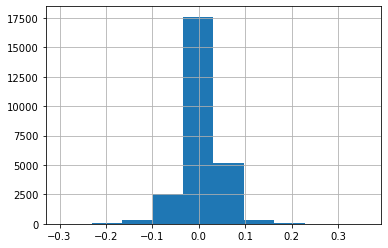

In [77]:
(lm.predict(X_zri_test) - y_zri_test).hist()

In [78]:
import statsmodels.api as sm
x = sm.add_constant(X_zri_train)
model = sm.OLS(y_zri_train, x)
results = model.fit()
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                    ZRI   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 6.005e+06
Date:                Wed, 16 Dec 2020   Prob (F-statistic):               0.00
Time:                        00:07:01   Log-Likelihood:             1.4568e+05
No. Observations:               78468   AIC:                        -2.914e+05
Df Residuals:                   78466   BIC:                        -2.913e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1785      0.003     60.204      

### Lasso with all features

In [80]:
lasso_test_X = full_num.loc[full_num['year']== 2017,].iloc[:,6:]
lasso_train_X = full_num.loc[full_num['year']!= 2017,].iloc[:,6:]

In [81]:
lasso_test_y = full_num.loc[full_num['year']== 2017,]['ZRI']
lasso_train_y = full_num.loc[full_num['year']!= 2017,]['ZRI']

In [82]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5, random_state=0, max_iter=3000, tol=0.01)

intercepts = []
R2  = []
coefs_dict = {}
MSE = []


alphaRange = np.logspace(-8,-4,20)
for alpha in alphaRange:
    lasso_cv.set_params(alphas=[alpha])  
    lasso_cv.fit(lasso_train_X, lasso_train_y)
    intercepts.append(lasso_cv.intercept_)
    coefs_dict[alpha] = lasso_cv.coef_
    R2.append(lasso_cv.score(lasso_train_X, lasso_train_y)) 
    MSE.append(lasso_cv.mse_path_.mean())

C:\Users\Chun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 296.7591460765496, tolerance: 70.28473204787024
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Chun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280.5337897445283, tolerance: 70.27722241783721
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Chun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 287.4144141575221, tolerance: 68.94069727164855
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Chun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Conver

C:\Users\Chun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 261.478005664403, tolerance: 69.62603285572415
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Chun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 351.82567798699614, tolerance: 86.91732343749437
  model = cd_fast.enet_coordinate_descent(
C:\Users\Chun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 293.46637801109057, tolerance: 70.28473204787024
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Chun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: Convergenc

C:\Users\Chun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263.4141780215004, tolerance: 68.94069727164855
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Chun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 234.647576264431, tolerance: 68.46910705410822
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Chun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236.44340133246317, tolerance: 69.62603285572415
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Chun\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Conver

In [83]:
for i in range(20):
    alpha = alphaRange[i]
    coef_alpha = coefs_dict[alpha]
    print(i, round(alpha,5), len(coef_alpha[coef_alpha!=0]),round(R2[i],5), round(MSE[i],6))

0 0.0 247 0.91889 0.009875
1 0.0 244 0.91881 0.009881
2 0.0 243 0.91875 0.009888
3 0.0 242 0.91861 0.009905
4 0.0 237 0.91849 0.00991
5 0.0 237 0.91838 0.009911
6 0.0 229 0.91826 0.009907
7 0.0 225 0.91816 0.009899
8 0.0 217 0.91799 0.009899
9 0.0 215 0.91783 0.009894
10 0.0 197 0.91757 0.00989
11 0.0 193 0.91707 0.009907
12 0.0 185 0.91603 0.009994
13 1e-05 174 0.91414 0.01016
14 1e-05 155 0.91217 0.010333
15 1e-05 138 0.90909 0.010624
16 2e-05 118 0.90532 0.011018
17 4e-05 105 0.9011 0.011465
18 6e-05 87 0.89435 0.0122
19 0.0001 69 0.88538 0.013156


In [ ]:
lasso_cv.set_params(alphas=alphaRange[19])

In [ ]:
lasso_cv.score(lasso_irs_test_X, lasso_irs_test_y)

In [ ]:
lasso_cv.set_params(alphas=alphaRange[2])

In [ ]:
lasso_cv.score(lasso_irs_test_X, lasso_irs_test_y)